# Unos biblioteka

In [1]:
from utils.data_utils import *
from utils.model_utils import *

# Podaci

## Učitavanje podataka

In [2]:
# Čitanje podataka
X, y = read_data('./data/data_1.csv')

## Podela na obučavajući i validacioni skup

In [3]:
# Podala podataka na obučavajući i testirajući/validacioni skup
X_train, y_train, X_test, y_test = train_test_split(X, y)

# Odabir prediktora

## Sortiranje prediktora

In [4]:
# Sortiranje pomoću "omotač" algoritma
sorted_pred_wrap = wrapper(X_train, y_train)

# Sortiranje pomoću koeficijenta korelacije
sorted_pred_corr = corr_pred(X_train, y_train)

## Obučavanje na podskupu sortiranih prediktora

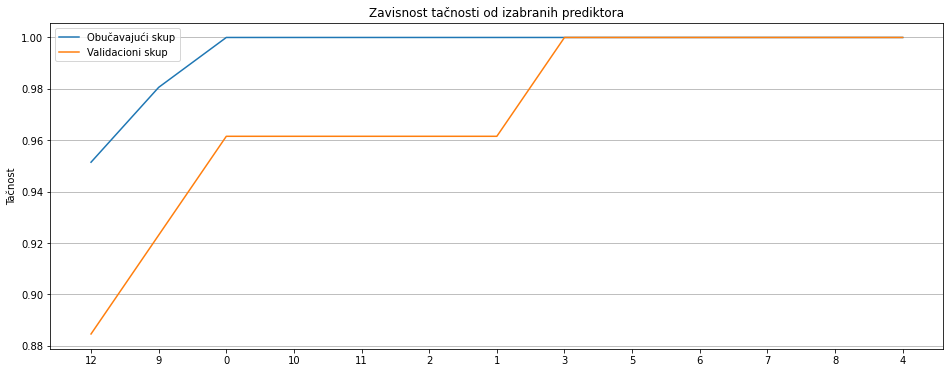

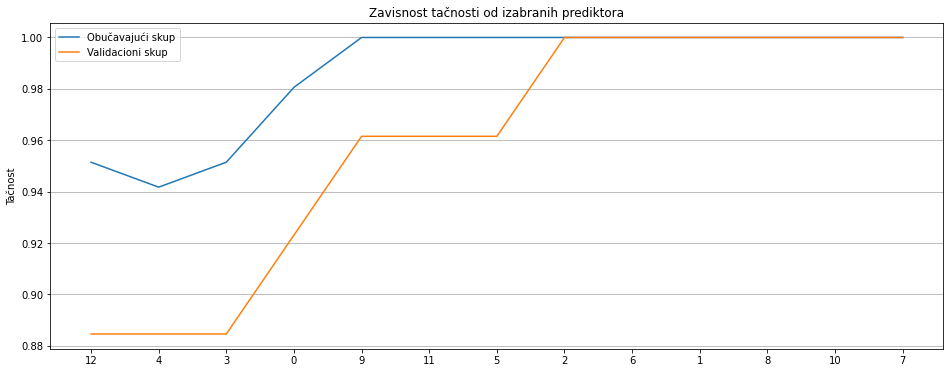

In [5]:
# Obučavanje i evaluacija na prediktorima izabranim "omotač" algoritmom
train_subsampled_predictors(X_train, y_train, X_test, y_test, sorted_pred_wrap, 'omotač algoritam')

# Obučavanje i evaluacija na prediktorima izabranim koeficijentima korelacije
train_subsampled_predictors(X_train, y_train, X_test, y_test, sorted_pred_corr, 'koeficijent korelacije')

## Optimalni par prediktora

Na osnovu veće tačnosti na validacionom skupu, "omotač" algoritam je pokazao nešto bolje performanse u odnosu na metodu koeficijenata korelacije i njena prva dva prediktora će biti korišćena u daljoj analizi.

In [6]:
# Indeksi najboljih prediktora
best = [9, 12]

# Izdvajanje najboljih prediktora
X_train, X_test = X_train[:,best], X_test[:,best]

# Obučavanje stabla

## Analiza zavisnosti greške od dubine stabla

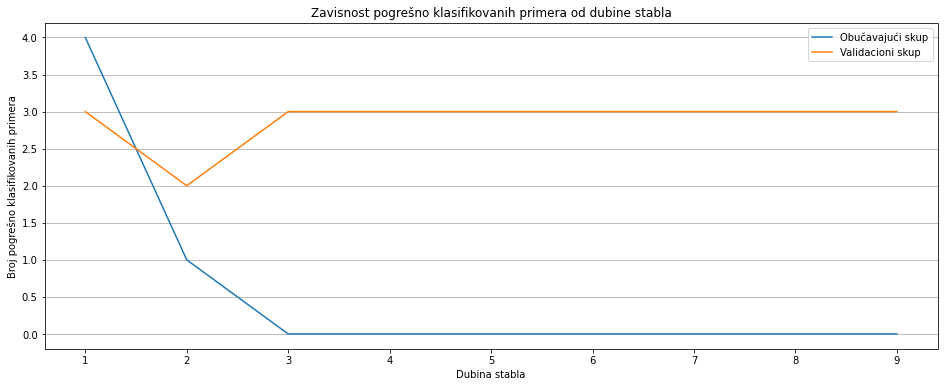

In [7]:
# Moguće dubine stabla
depth_list = [i for i in range(1,10)]

# Obučavanje i evaluacije modela
error_wrt_depth(X_train, y_train, X_test, y_test, depth_list, disp_error=True)

Gornji grafik ukazuje na to da dubina stabla veća od 3 zapravo ne donosi nikakvo poboljšanje u perfomansama modela.

## Prikaz granice odlučivanja u zavisnosti od dubine stabla

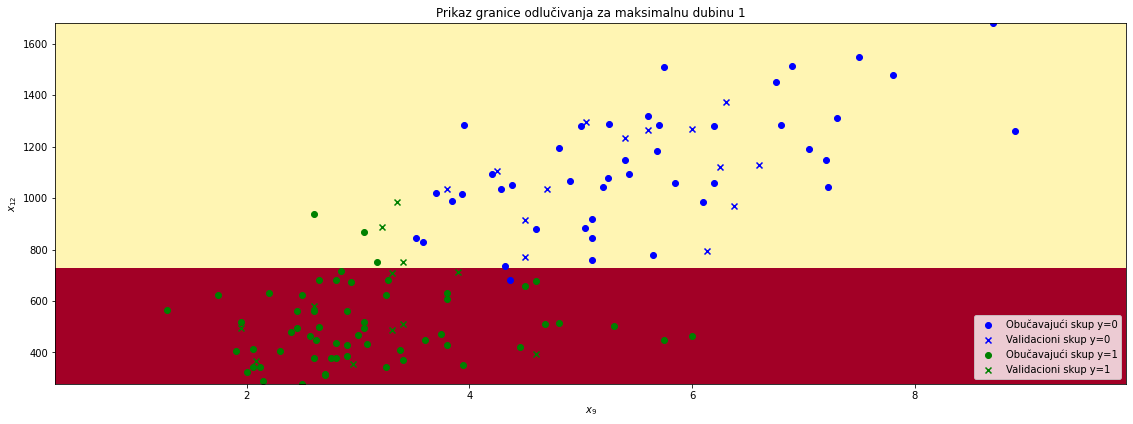

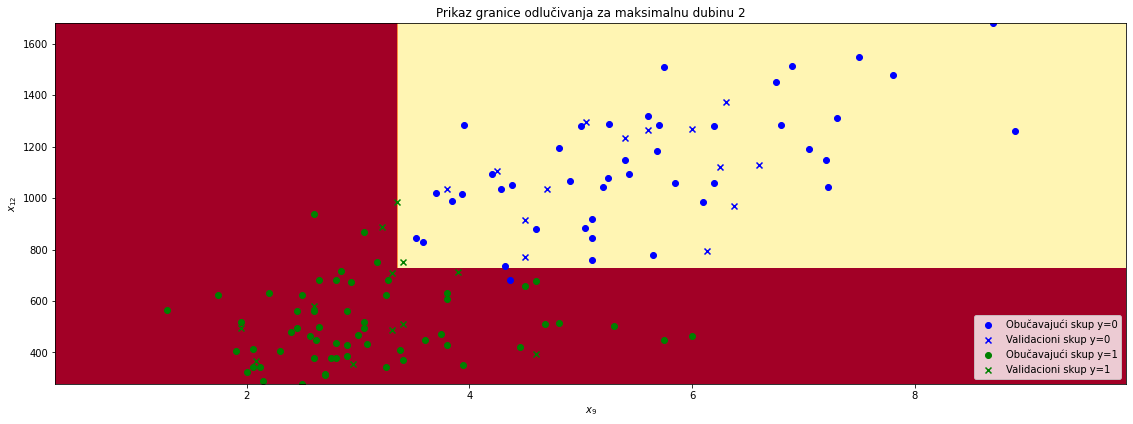

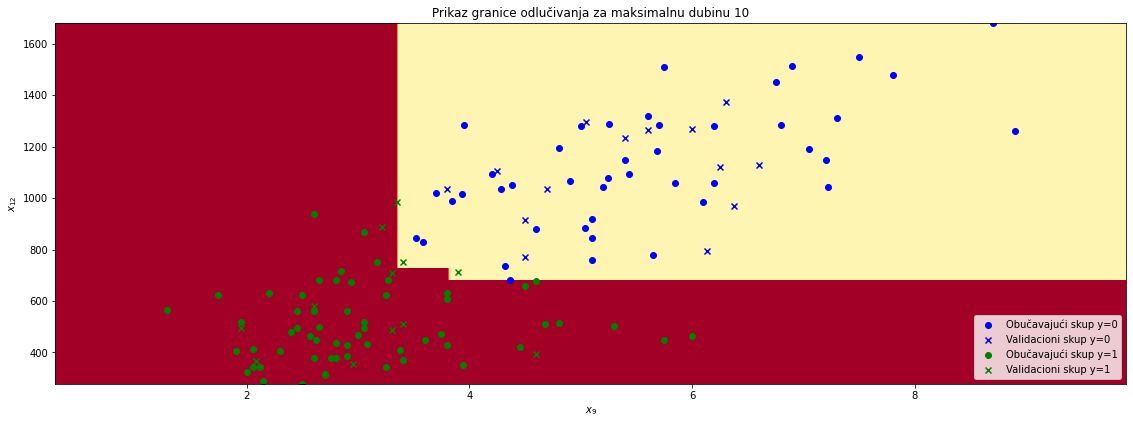

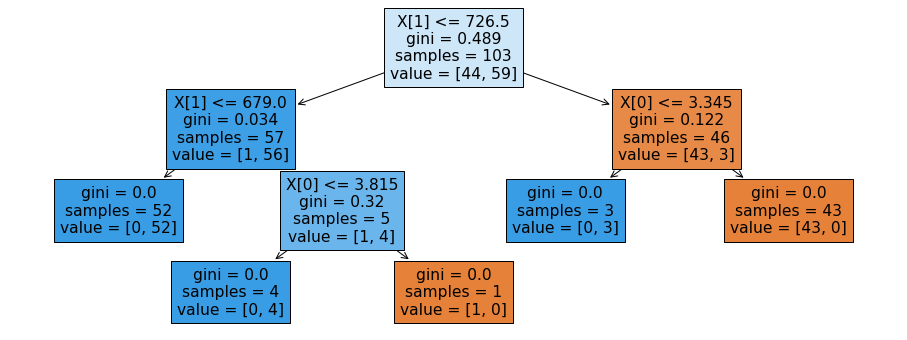

In [8]:
# Moguće dubine stabla
depth_list = [1, 2, 10]

# Obučavanje i prikaz granice odlučivanja modela
error_wrt_depth(X_train, y_train, X_test, y_test, depth_list, disp_decision=True, disp_tree=True)

Grafički prikaz stabla kao i granice odlučivanja za stablo veće od 3 potvrđuju da je skup prediktora u listovima homogen na najvećoj dubini 3 i da nema smisla povećavati maksimalnu dubinu stabla odlučivanja. Za maksimalnu dubinu 3 su svi odbirci obučavajućeg skupa tačno klasifikovani.

# Ansambli

## Podaci

### Učitavanje podataka

In [2]:
# Čitanje podataka
X, y = read_data('./data/data_2.csv')

for y_values in set(y):
    print(f"Broj primera za y={y_values} je {sum(y==y_values)}")

Broj primera za y=0.0 je 423
Broj primera za y=1.0 je 290


Ova brza provera ukazuje na to da klase nisu sasvim jednako zastupljene i da bi bilo korisno ispitati i hiper-parametar koji se donosi na otežinjavanje odbiraka klasa.

### Podela podataka

In [3]:
# Podala podataka na obučavajući i testirajući/validacioni skup
X_train, y_train, X_test, y_test = train_test_split(X, y)

## Random Forest

### Ispitivanje uticaja promene hiper-parametara

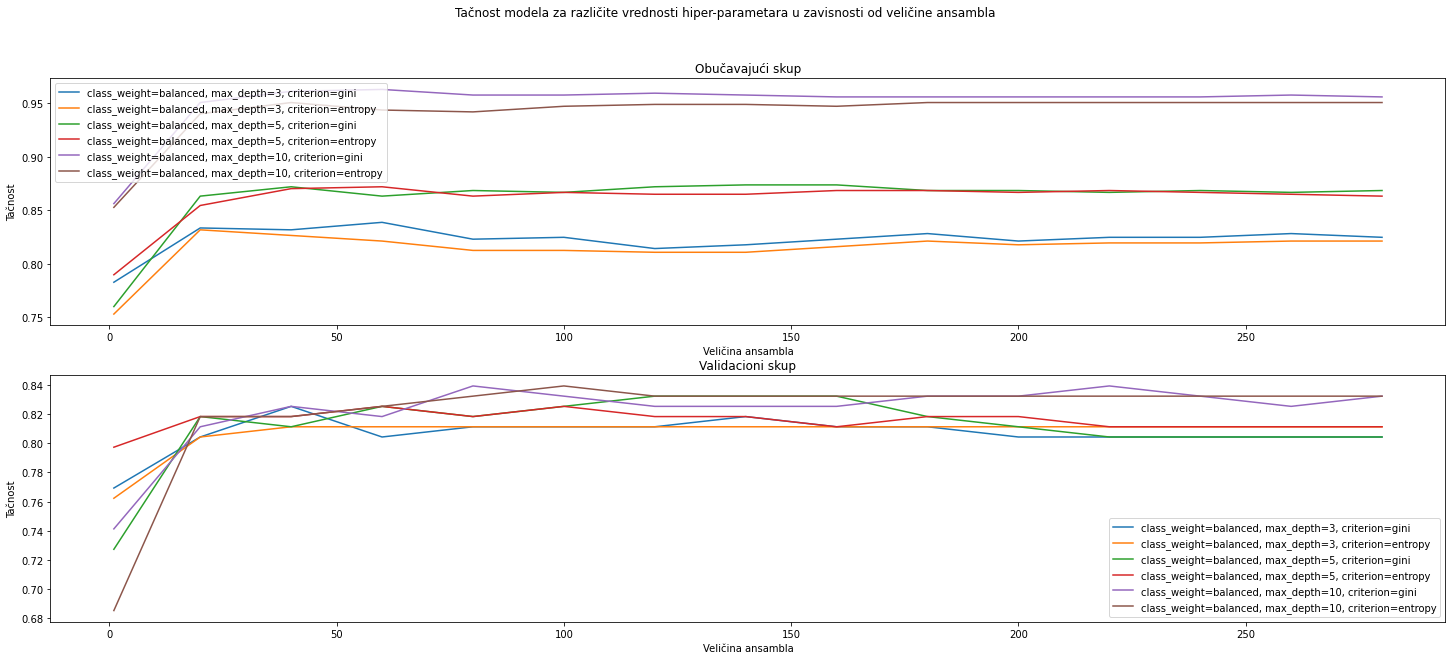

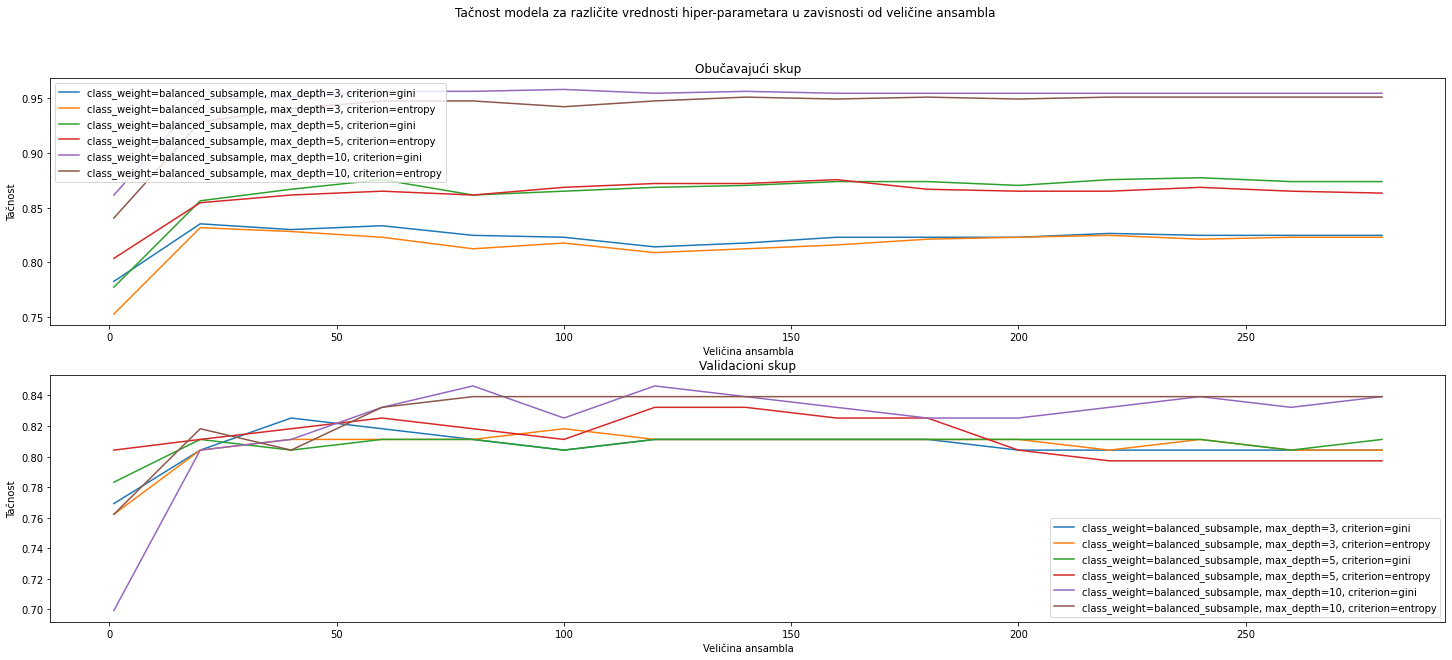

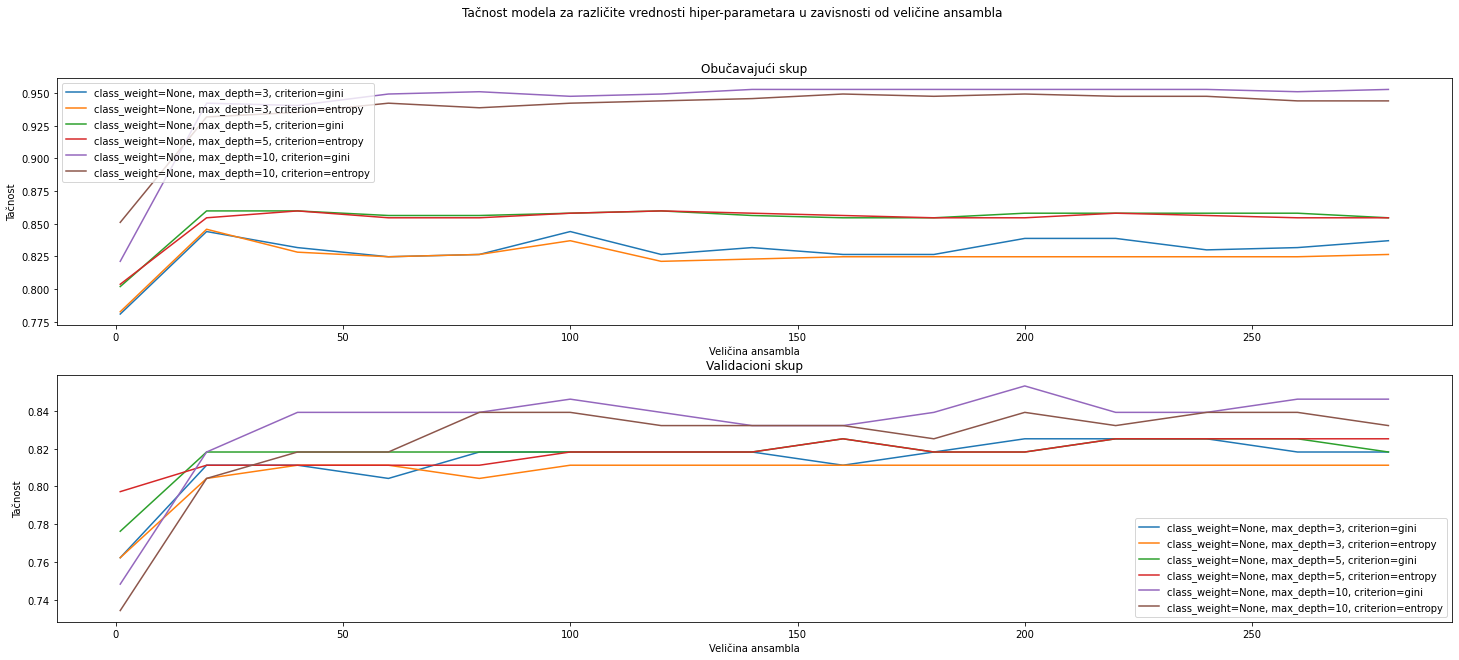

In [4]:
# Moguće vrednosti hiper-parametara
params_dict = {
    "class_weight": ['balanced', 'balanced_subsample', None],
    "max_depth": [3, 5, 10],
    "criterion": ['gini','entropy']
}

# Veličine ansambla
n_estimators_list = [1] + [i*20 for i in range(1, 15)]

# Generisanje listi kombinacija
params_list = get_combinations(params_dict)

# Obučavanje, evaluacija i prikaz rezultata
analyze_ensemble_size((X_train, y_train, X_test, y_test), 'RF', params_list, n_estimators_list, n_split=3)

### Ispitivanje uticaja veličine stabla

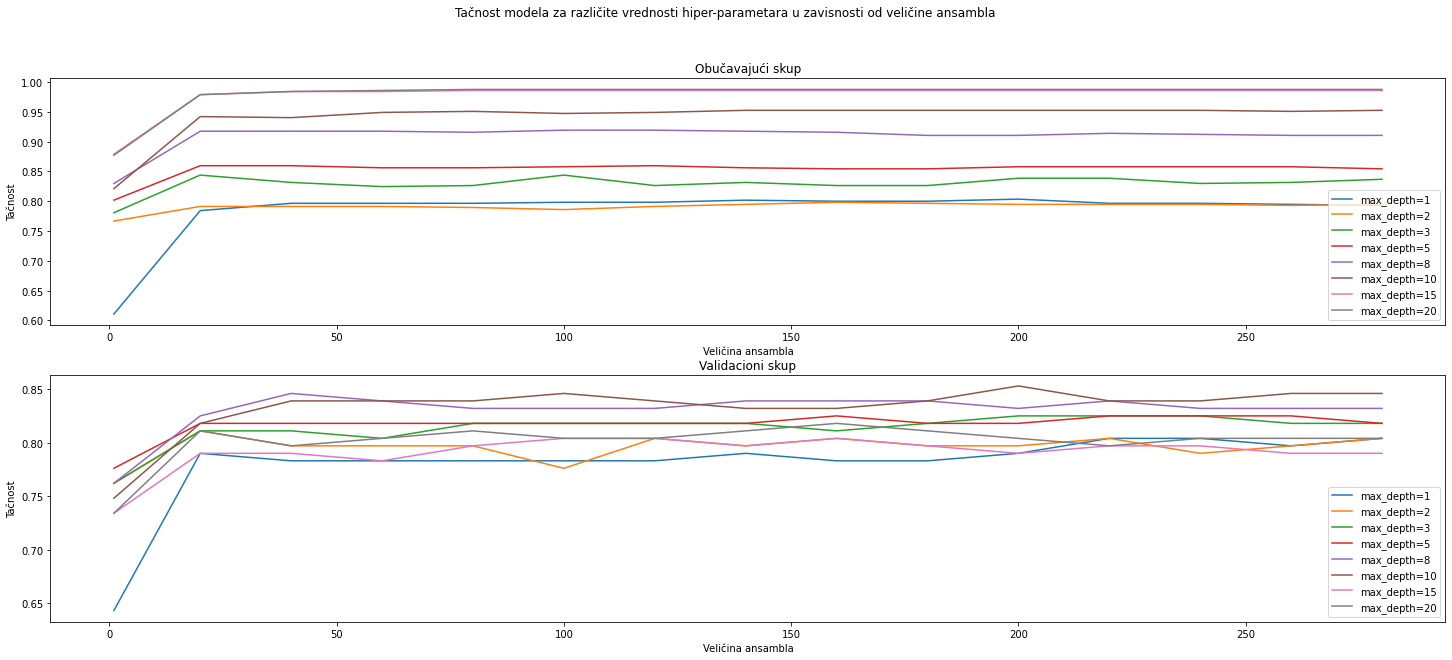

In [9]:
# Moguće vrednosti hiper-parametara
params_dict = {
    "max_depth" : [1, 2, 3, 5, 8, 10, 15, 20]
}

# Veličine ansambla
n_estimators_list = [1] + [i*20 for i in range(1, 15)]

# Generisanje listi kombinacija
params_list = get_combinations(params_dict)

# Obučavanje, evaluacija i prikaz rezultata
analyze_ensemble_size((X_train, y_train, X_test, y_test), 'RF', params_list, n_estimators_list)

### Ispitivanje uticaja maksimalnog broja odlika

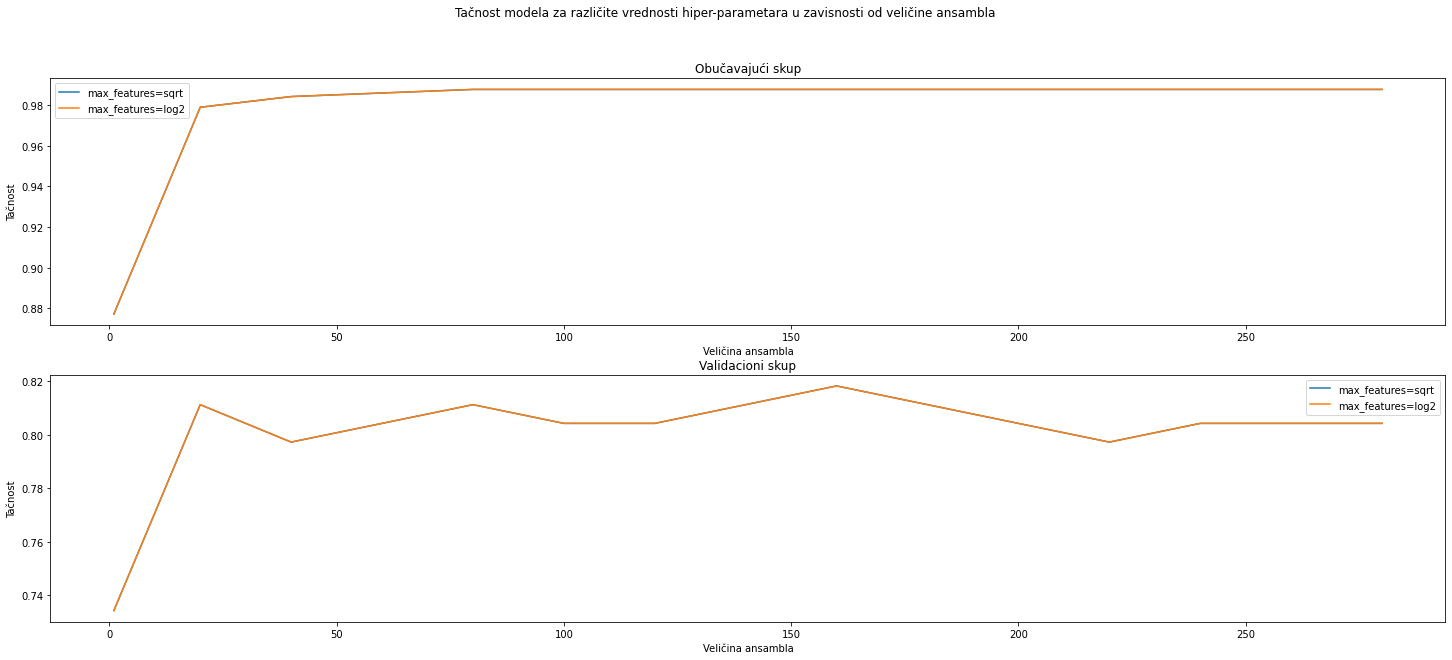

In [10]:
# Moguće vrednosti hiper-parametara
params_dict = {
    "max_features" : ["sqrt", "log2"]
}

# Veličine ansambla
n_estimators_list = [1] + [i*20 for i in range(1, 15)]

# Generisanje listi kombinacija
params_list = get_combinations(params_dict)

# Obučavanje, evaluacija i prikaz rezultata
analyze_ensemble_size((X_train, y_train, X_test, y_test), 'RF', params_list, n_estimators_list)

## Gradient Boosting Trees

### Ispitivanje uticaja promene hiper-parametara

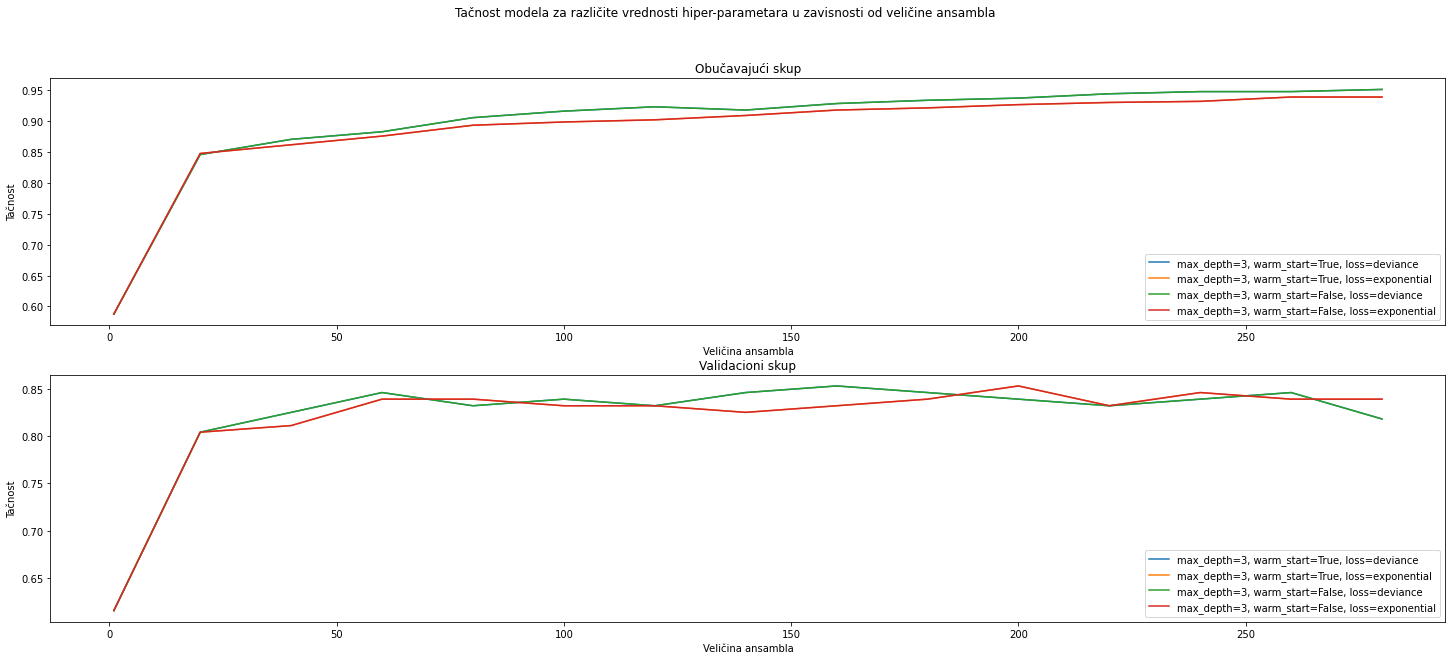

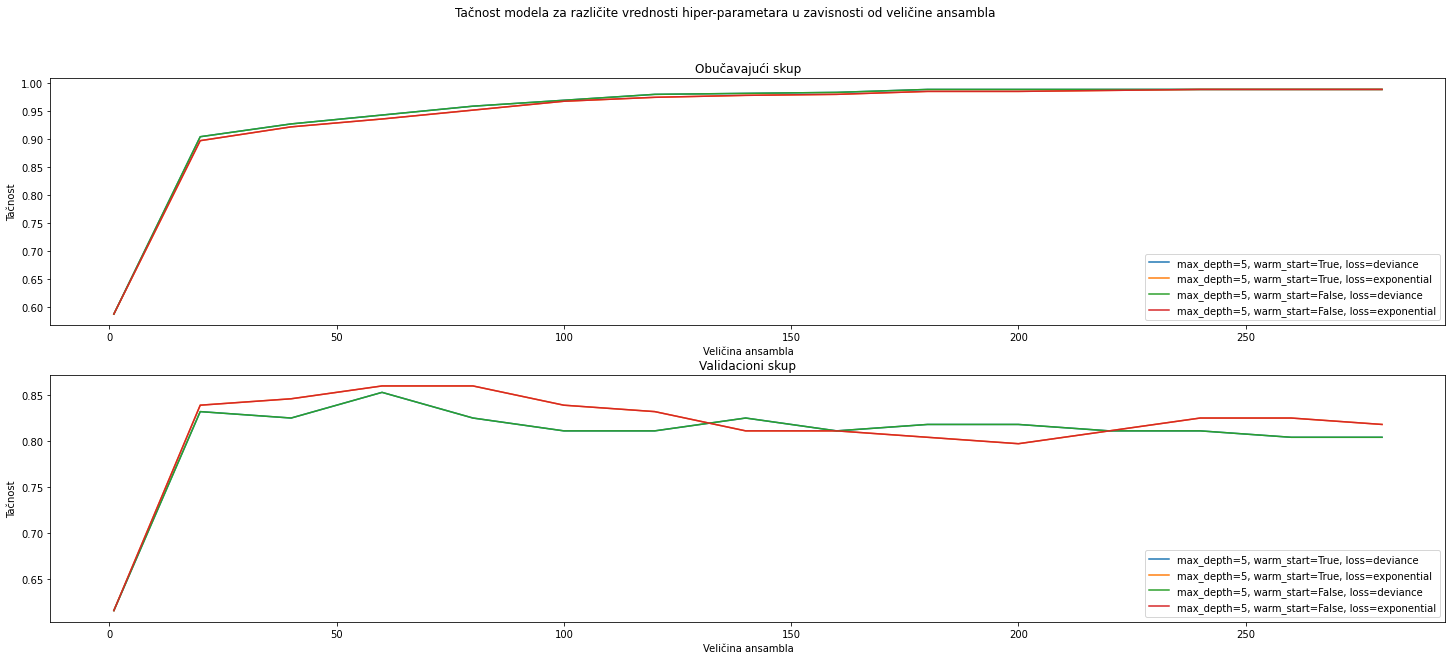

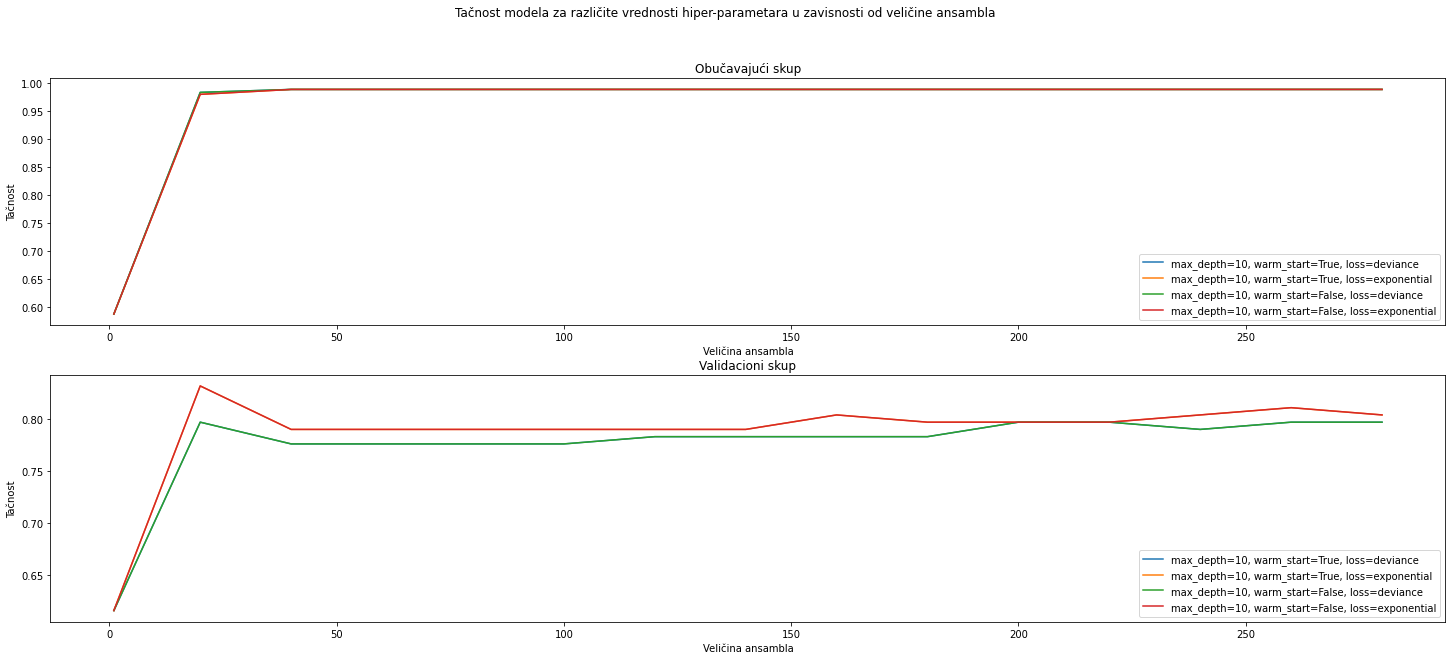

In [5]:
# Moguće vrednosti hiper-parametara
params_dict = {
    "max_depth": [3, 5, 10],
    "warm_start": [True, False],
    "loss": ['deviance', 'exponential']
}

# Veličine ansambla
n_estimators_list = [1] + [i*20 for i in range(1, 15)]

# Generisanje listi kombinacija
params_list = get_combinations(params_dict)

# Obučavanje, evaluacija i prikaz rezultata
analyze_ensemble_size((X_train, y_train, X_test, y_test), 'GB', params_list, n_estimators_list, n_split=3)

### Ispitivanje uticaja veličine stabla

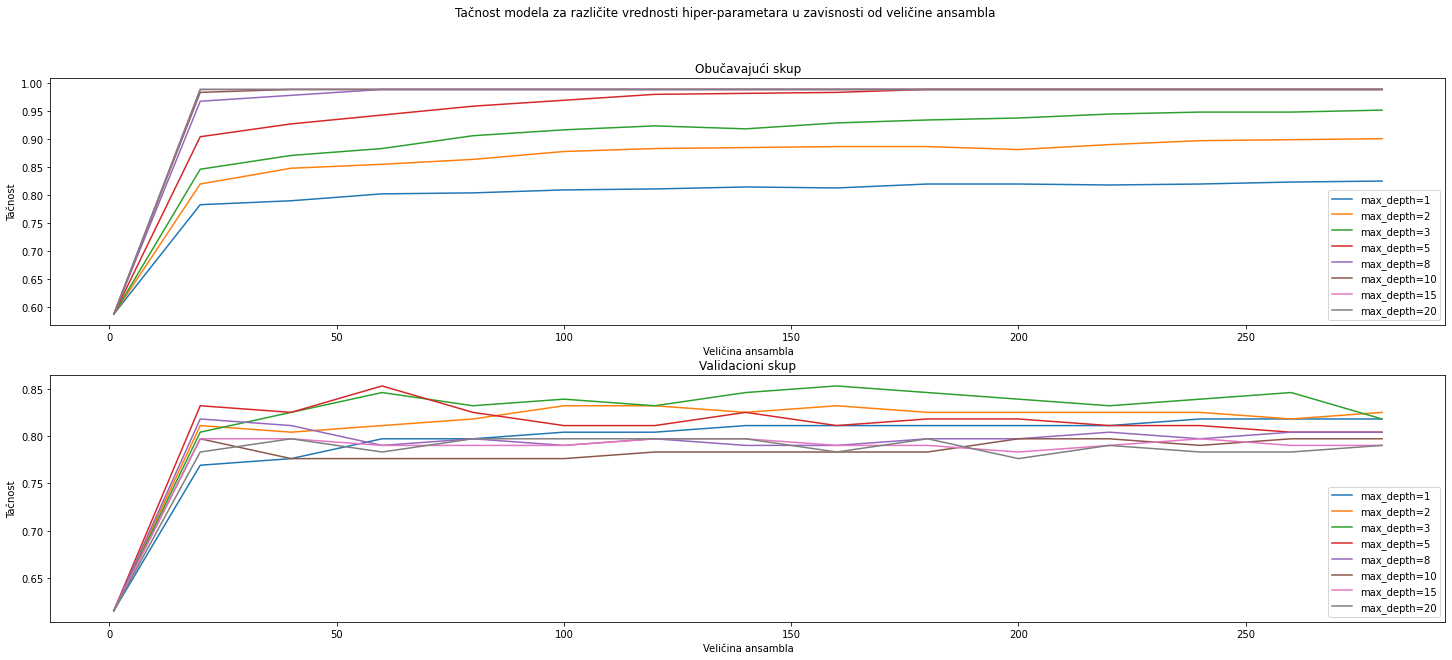

In [12]:
# Moguće vrednosti hiper-parametara
params_dict = {
    "max_depth" : [1, 2, 3, 5, 8, 10, 15, 20]
}

# Veličine ansambla
n_estimators_list = [1] + [i*20 for i in range(1, 15)]

# Generisanje listi kombinacija
params_list = get_combinations(params_dict)

# Obučavanje, evaluacija i prikaz rezultata
analyze_ensemble_size((X_train, y_train, X_test, y_test), 'GB', params_list, n_estimators_list)

### Ispitivanje uticaja stope obučavanja

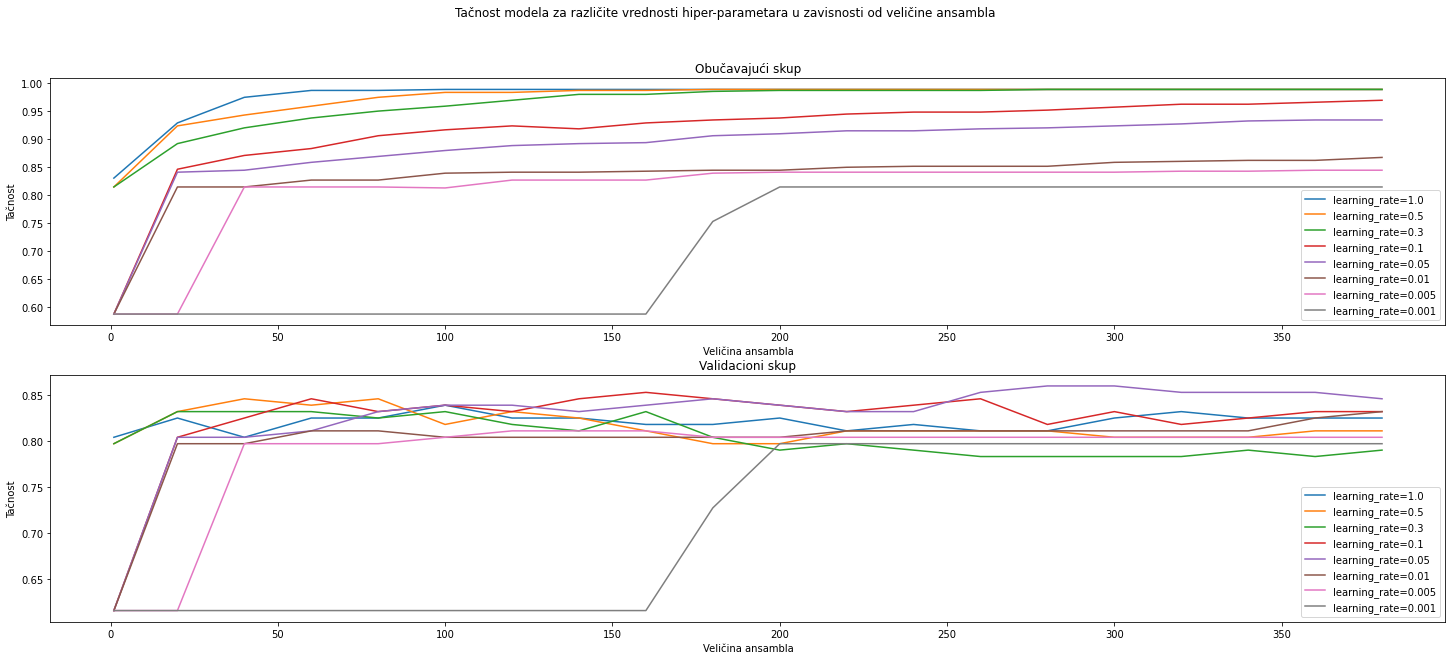

In [14]:
# Moguće vrednosti hiper-parametara
params_dict = {
    "learning_rate" : [1, .5, .3, .1, .05, .01, .005, .001]
}

# Veličine ansambla
n_estimators_list = [1] + [i*20 for i in range(1, 20)]

# Generisanje listi kombinacija
params_list = get_combinations(params_dict)

# Obučavanje, evaluacija i prikaz rezultata
analyze_ensemble_size((X_train, y_train, X_test, y_test), 'GB', params_list, n_estimators_list)